# 2D Regression with Conditional Normal Model

## Generate data

In this example, we will solve a 2d-regression task with Conditional Normal Model. In this section, we generate synthetic data using two different transformations on a linear space C. The data is generated by applying an exponential decay and a logarithmic transformation to C, with added noise that follows a multivariate normal distribution.

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np

In [16]:
np.random.seed(42)

In [17]:
def exp_transform(X):
    return np.exp(-X)

def log_transform(X):
    return np.log(1 + X)

In [18]:
cov = np.array([[1, 0.9], 
                [0.9, 1]])

C = np.linspace(0, 1, 2000).reshape(-1, 1)

X1 = exp_transform(C)
X2 = log_transform(C)

X = np.hstack([X1, X2]) + 0.1 * np.random.multivariate_normal([0, 0], cov, 2000)

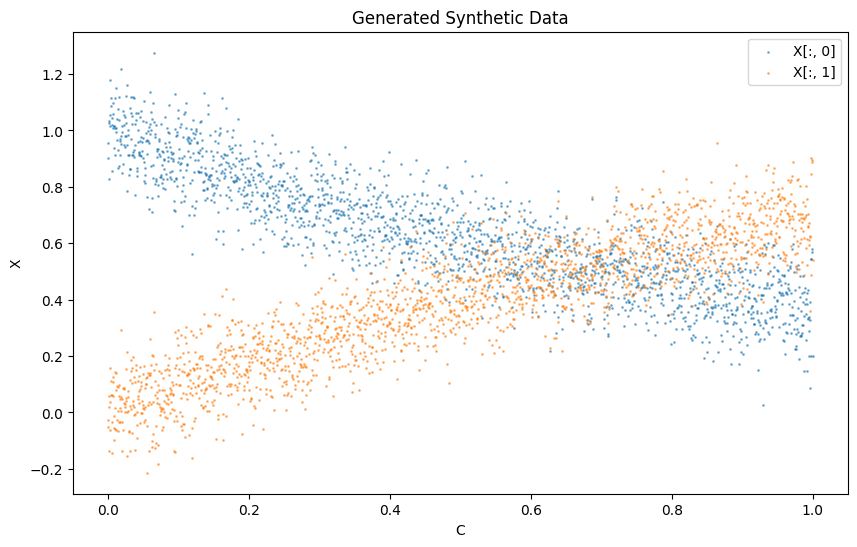

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(C, X[:, 0], s=1, alpha=0.5, label="X[:, 0]")
plt.scatter(C, X[:, 1], s=1, alpha=0.5, label="X[:, 1]")
plt.xlabel("C")
plt.ylabel("X")
plt.legend()
plt.title("Generated Synthetic Data")
plt.show()

## Independent Covariance

Here, we train a ConditionalNormal model using independent covariance, where the model assumes that the data are independent and the covariance matrix is the identity matrix. This means that the model does not account for any potential correlations between the variables. We then generate new samples from this model and compare them with the original data.

In [20]:
from probaforms.models import ConditionalNormal

model = ConditionalNormal(lr=0.01, n_epochs=100, use_independent_covariance=True)
model.fit(X, C) 

x_gen_ind = model.sample(C)

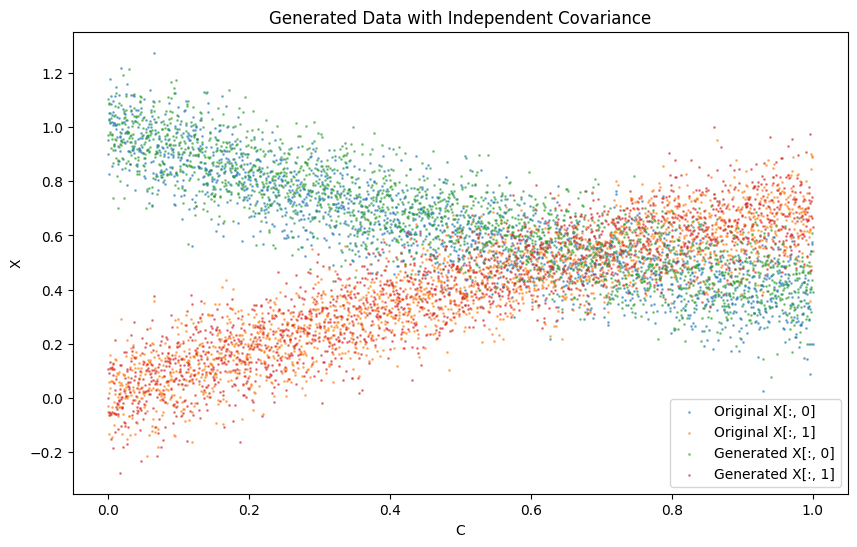

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(C, X[:, 0], s=1, alpha=0.5, label="Original X[:, 0]")
plt.scatter(C, X[:, 1], s=1, alpha=0.5, label="Original X[:, 1]")
plt.scatter(C, x_gen_ind[:, 0], s=1, alpha=0.5, label="Generated X[:, 0]")
plt.scatter(C, x_gen_ind[:, 1], s=1, alpha=0.5, label="Generated X[:, 1]")
plt.xlabel("C")
plt.ylabel("X")
plt.legend()
plt.title("Generated Data with Independent Covariance")
plt.show()

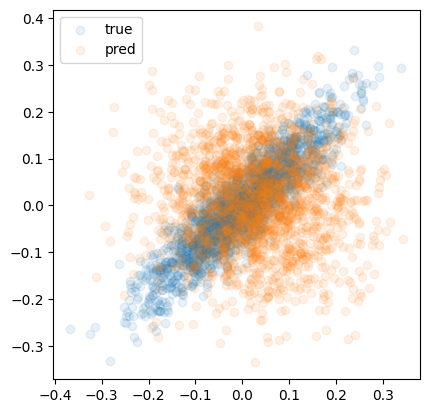

In [22]:
plt.scatter(X[:, 0] - X1[:, 0], X[:, 1] - X2[:, 0], alpha=0.1, label='true')
plt.scatter(x_gen_ind[:, 0] - X1[:, 0], x_gen_ind[:, 1] - X2[:, 0], alpha=0.1, label='pred')

plt.legend()

plt.gca().set_aspect('equal', adjustable='box')

plt.show()


## Dependent Covariance

Next, we repeat the procedure using a ConditionalNormal model with dependent covariance. This approach allows the model to capture more complex relationships between the variables.

In [23]:
from probaforms.models import ConditionalNormal


model = ConditionalNormal(lr=0.01, n_epochs=100, use_independent_covariance=False)
model.fit(X, C) 


x_gen_dep = model.sample(C)

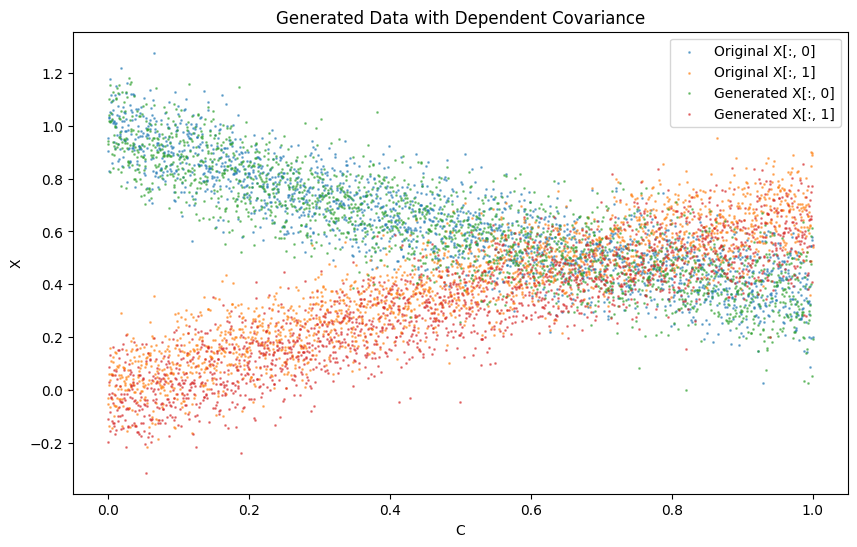

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(C, X[:, 0], s=1, alpha=0.5, label="Original X[:, 0]")
plt.scatter(C, X[:, 1], s=1, alpha=0.5, label="Original X[:, 1]")
plt.scatter(C, x_gen_dep[:, 0], s=1, alpha=0.5, label="Generated X[:, 0]")
plt.scatter(C, x_gen_dep[:, 1], s=1, alpha=0.5, label="Generated X[:, 1]")
plt.xlabel("C")
plt.ylabel("X")
plt.legend()
plt.title("Generated Data with Dependent Covariance")
plt.show()

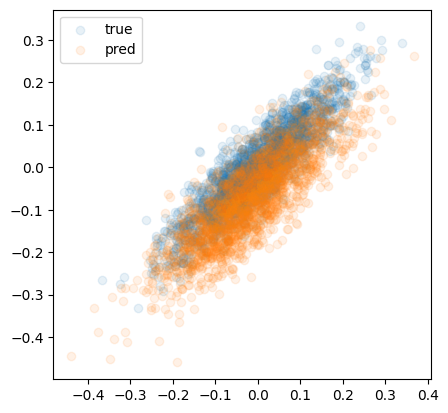

In [25]:
plt.scatter(X[:, 0] - X1[:, 0], X[:, 1] - X2[:, 0], alpha=0.1, label='true')
plt.scatter(x_gen_dep[:, 0] - X1[:, 0], x_gen_dep[:, 1] - X2[:, 0], alpha=0.1, label='pred')

plt.legend()

plt.gca().set_aspect('equal', adjustable='box')

plt.show()